<font size="3">Introduction to Machine Learning</font><br>
<font size="3">Digital Sciences for Hi-Tech</font><br>
<font size="2">Spring 2020-2021</font><br>
<font size="2">Lecturer: Mr. Dor Bank</font><br>
<font size="2">Teaching Assistant: Mr. Shahaf Goren</font><br>
# Final Project - Introduction to Machine Learning
Submitted by Noa Shapira and Tomer Blum

**Importing libraries:**

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc, plot_roc_curve, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from numpy import interp
from scipy import stats

## Table of Contents:
* [Part 1: Data Exploration](#section1)
    * [Part 1.1: Unlabeled Analysis](#section1_1)
    * [Part 1.1: Labeled Analysis](#section1_2)
* [Part 2: Preprocessing](#section2)
* [Part 3: Modeling](#section3)
* [Part 4: Model Evaluation](#section4)
* [Part 5: Test Predictions](#section5)

## Data Exploration <a class="anchor" id="section1"></a>
## 1.1 Unlabeled Analysis <a class="anchor" id="section1_1"></a>

**First** we read the feature_data file and present it's first five examples in order to get a glimpse of the data set

In [105]:
df = pd.read_csv('feature_data.csv')
df.head()

,Unnamed: 0,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
0,51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,...,0,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1.0
1,28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,...,0,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,NaN
2,21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,...,4,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,NaN
3,17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,...,3,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,NaN
4,83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,...,0,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,NaN


**Exploring** the different data types each feature has

In [106]:
df.dtypes

Unnamed: 0               int64
time_until_order       float64
order_year               int64
order_month             object
order_week              object
order_day_of_month       int64
adults                   int64
children               float64
babies                   int64
country                 object
order_type              object
acquisition_channel     object
prev_canceled            int64
prev_not_canceled        int64
changes                float64
deposit_type            object
agent                  float64
company                float64
customer_type           object
adr                    float64
anon_feat_0            float64
anon_feat_1              int64
anon_feat_2              int64
anon_feat_3              int64
anon_feat_4              int64
anon_feat_5            float64
anon_feat_6            float64
anon_feat_7            float64
anon_feat_8              int64
anon_feat_9            float64
anon_feat_10           float64
anon_feat_11           float64
anon_fea

Now, we will divide our data into categorial and numeric features, it will help us later

In [107]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

We need to exclude `Unnamed: 0` from the `numerical_cols` list because we wouldn't want to scale it later in the preprocessing stage.

In [108]:
numerical_cols = numerical_cols.drop('Unnamed: 0')

We will plot a histogram for each of our numerical features:

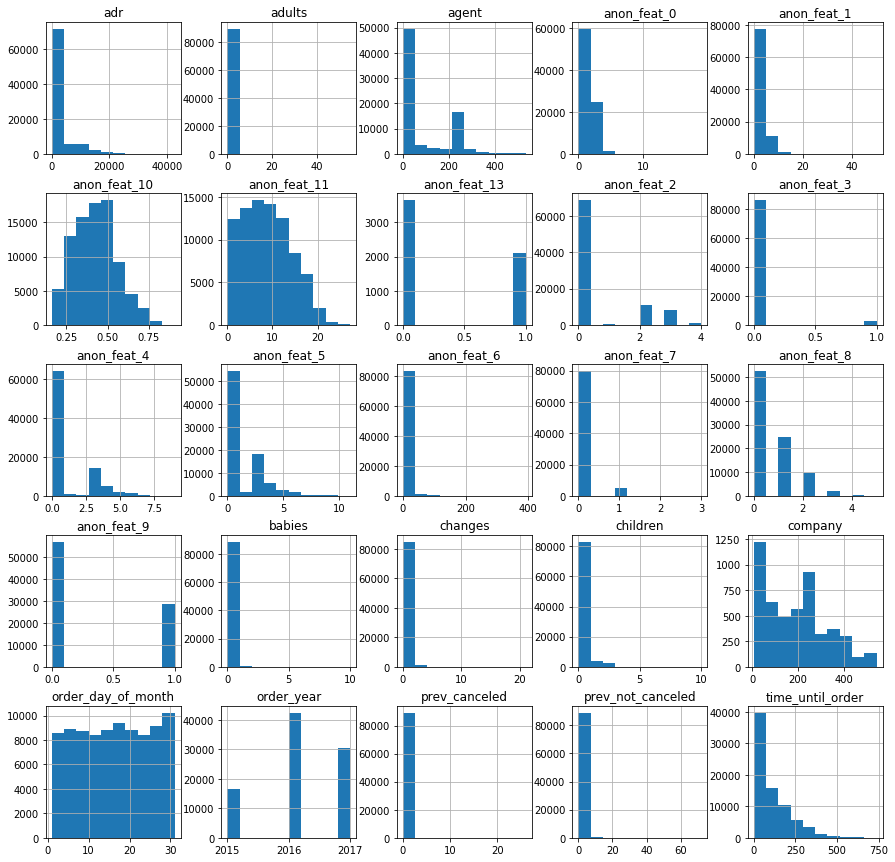

In [109]:
df[numerical_cols].hist(figsize = (15,15))
plt.show()

Using `describe()`, we get a quick statistic summary of our data

In [110]:
df.describe(include = object)
df.describe()

,Unnamed: 0,time_until_order,order_year,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,...,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_13
count,89542.000000,76861.000000,89542.000000,89542.000000,89542.000000,89538.000000,89542.000000,89542.000000,89542.000000,86065.000000,...,89542.000000,89542.000000,85510.000000,85309.000000,85294.000000,89542.000000,85811.000000,86810.000000,84585.000000,5776.000000
mean,59716.762871,103.673879,2016.157658,15.828807,1.857497,0.103732,0.007896,0.087411,0.137701,0.223877,...,0.032231,0.989971,1.330944,2.339401,0.062607,0.571922,0.335691,0.427146,8.845679,0.365132
std,34495.242240,106.940156,0.707461,8.779753,0.565296,0.397797,0.095194,0.849799,1.496269,0.663361,...,0.176613,1.698086,1.879927,17.516854,0.243415,0.793567,0.472234,0.128140,5.236673,0.481509
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161008,0.038632,0.000000
25%,29838.250000,18.000000,2016.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328012,4.452191,0.000000
50%,59743.500000,69.000000,2016.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425622,8.422255,0.000000
75%,89610.500000,159.000000,2017.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.511077,12.712815,1.000000
max,119388.000000,737.000000,2017.000000,31.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,...,1.000000,9.000000,11.000000,391.000000,3.000000,5.000000,1.000000,0.907525,27.172399,1.000000


Let's see **how many NaN values** each feature has.<br>
We will need to solve this later at the preprocessing step.

In [111]:
df.isna().sum()

Unnamed: 0                 0
time_until_order       12681
order_year                 0
order_month             3434
order_week                 0
order_day_of_month         0
adults                     0
children                   4
babies                     0
country                 4341
order_type                 0
acquisition_channel        0
prev_canceled              0
prev_not_canceled          0
changes                 3477
deposit_type            9006
agent                  12196
company                84480
customer_type           9895
adr                     2983
anon_feat_0             3381
anon_feat_1                0
anon_feat_2                0
anon_feat_3                0
anon_feat_4                0
anon_feat_5             4032
anon_feat_6             4233
anon_feat_7             4248
anon_feat_8                0
anon_feat_9             3731
anon_feat_10            2732
anon_feat_11            4957
anon_feat_12               0
anon_feat_13           83766
dtype: int64

Checking how many countries are in the data

In [112]:
df['country'].value_counts()

PRT    34804
GBR     8676
FRA     7448
ESP     6170
DEU     5280
       ...  
SMR        1
FJI        1
HND        1
TMP        1
NIC        1
Name: country, Length: 163, dtype: int64

Let's look at the countries that appears in **more than 1%** of the data

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA', 'NLD', 'CHE', 'CN', 'AUT'] 

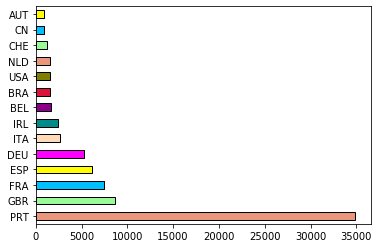

In [113]:
# New list of target countries
countries = []

# Checking the total number of appearances per country
countries_sum = df['country'].value_counts()

# Size of countries_sum (number of countries)
size_cs = countries_sum.size

# Finding target countries and adding them to the list
for i in range(size_cs):
    if countries_sum[i] > len(df['country']) * 0.01:
        countries.append(countries_sum.index[i])
        
print(countries,end=' ')

df['country'].value_counts().head(14).plot.barh(color=['darksalmon','palegreen','deepskyblue','yellow','fuchsia','peachpuff','darkcyan','darkmagenta','crimson','olive'],edgecolor = 'black')
plt.show()

Let's try and plot the total amount of **orders per week and month** (we can see a peak of orders around the 30th week/August)

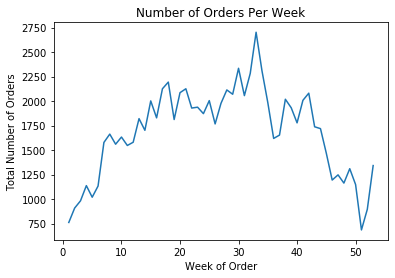

In [114]:
# removing 'week_' from order week and converting to int
df.loc[:,'order_week'] = [col.lstrip('week_') for col in df.loc[:,'order_week']]
df['order_week'] = df['order_week'].astype(int)

# inserting order_week to numerical_cols
numerical_cols = numerical_cols.insert(0,'order_week')

# plotting
plt.plot(df['order_week'].value_counts().sort_index())
plt.title("Number of Orders Per Week")
plt.xlabel("Week of Order")
plt.ylabel("Total Number of Orders")
plt.show()

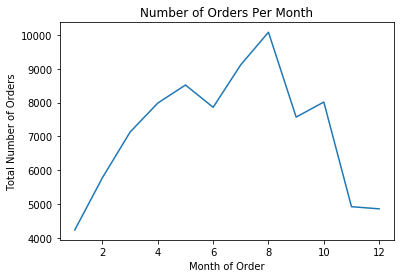

In [115]:
# converting order_month to numeric values
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['order_month'] = df['order_month'].map(d)

# inserting order_month to numerical_cols
numerical_cols = numerical_cols.insert(0,'order_month')

# plotting
plt.plot(df['order_month'].value_counts().sort_index())
plt.title("Number of Orders Per Month")
plt.xlabel("Month of Order")
plt.ylabel("Total Number of Orders")
plt.show()

Plotting the correlation matrix as a hitmap

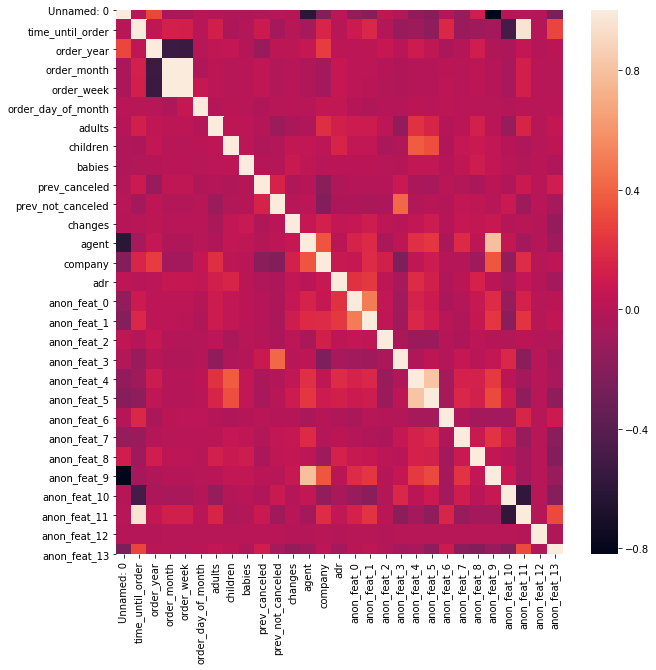

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),xticklabels = df.corr().columns, yticklabels = df.corr().columns)
plt.show()

From the correlation matrix, we extracted pairs that seemed highly correlated.<br>
We consider removing `agent` and `order_month`, and `time_until_order` or `anon_feat_11`

In [117]:
print('The correlation between Order Week and Order Month is', str(df['order_week'].corr(df['order_month'])))
print('The correlation between Time Until Order and Unknown Feature 11 is', str(df['time_until_order'].corr(df['anon_feat_11'])))
print('The correlation between Agent and Unknown Feature 9 is', str(df['agent'].corr(df['anon_feat_9'])))

The correlation between Order Week and Order Month is 0.9951112127618209
The correlation between Time Until Order and Unknown Feature 11 is 0.9599797086145226
The correlation between Agent and Unknown Feature 9 is 0.7904021821629236


After observing the hitmap above, we can plot the correlated features and **search for patterns**

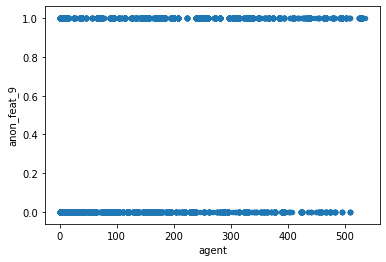

In [118]:
df.plot.scatter(x='agent',y='anon_feat_9')
plt.show()

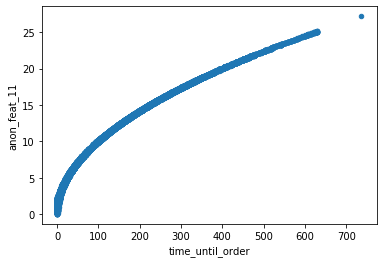

In [119]:
df.plot.scatter(x='time_until_order',y='anon_feat_11')
plt.show()

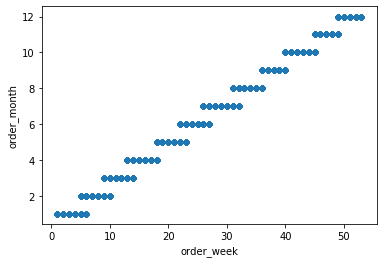

In [120]:
df.plot.scatter(x='order_week',y='order_month')
plt.show()

**Plotting categorical variables**

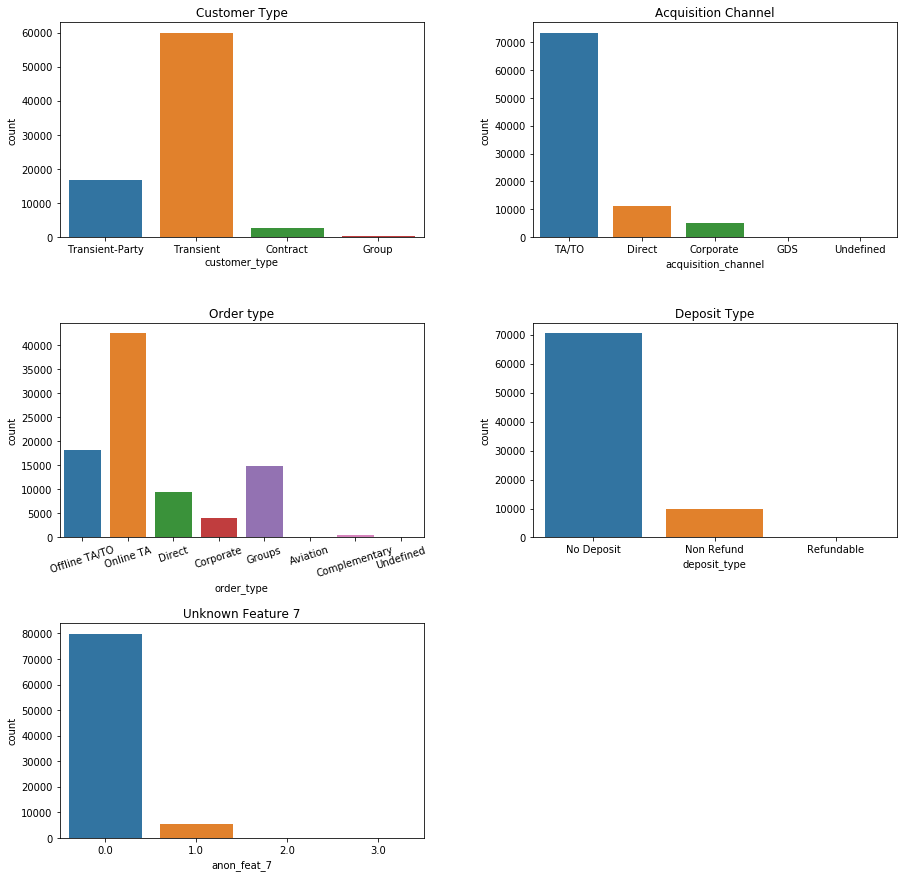

In [121]:
# Creating a subplots grid
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))

# Adjusts spacing between sub plots
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

# Plotting 'customer_type'
sns.countplot(ax = axes[0,0], x = 'customer_type', data = df)
axes[0,0].set_title('Customer Type')

# Plotting 'acquisition_channel'
sns.countplot(ax = axes[0,1], x = 'acquisition_channel', data = df)
axes[0,1].set_title('Acquisition Channel')

# Plotting 'order_type' 
sns.countplot(ax = axes[1,0], x = 'order_type', data = df)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 18) # Rotates X labels to a readable angle
axes[1,0].set_title('Order type')

# Plotting 'deposit_type'
sns.countplot(ax = axes[1,1], x = 'deposit_type', data = df)
axes[1,1].set_title('Deposit Type')

# Plotting 'anon_feat_7'
sns.countplot(ax = axes[2,0], x = 'anon_feat_7', data = df)
axes[2,0].set_title('Unknown Feature 7')

# Deletes the excess subplot from the bottom right corner
fig.delaxes(axes[2][1])

plt.show()

**In the bar plots above, we can see few intresting things:**
<br>We can clearly see that:
- The most common `customer_type` is Transient.
- We can see that `acquisition_channel` and `order_type` values are almost similar, we will consider removing one of them.
- In `anon_feat_7` the ratio between 0 and 1 is extremely high, we will consider removing this feature from the dataset.


In order to find **outliers**, we plotted a boxplot for every feature that seemed irregular in the first plotting of the features 

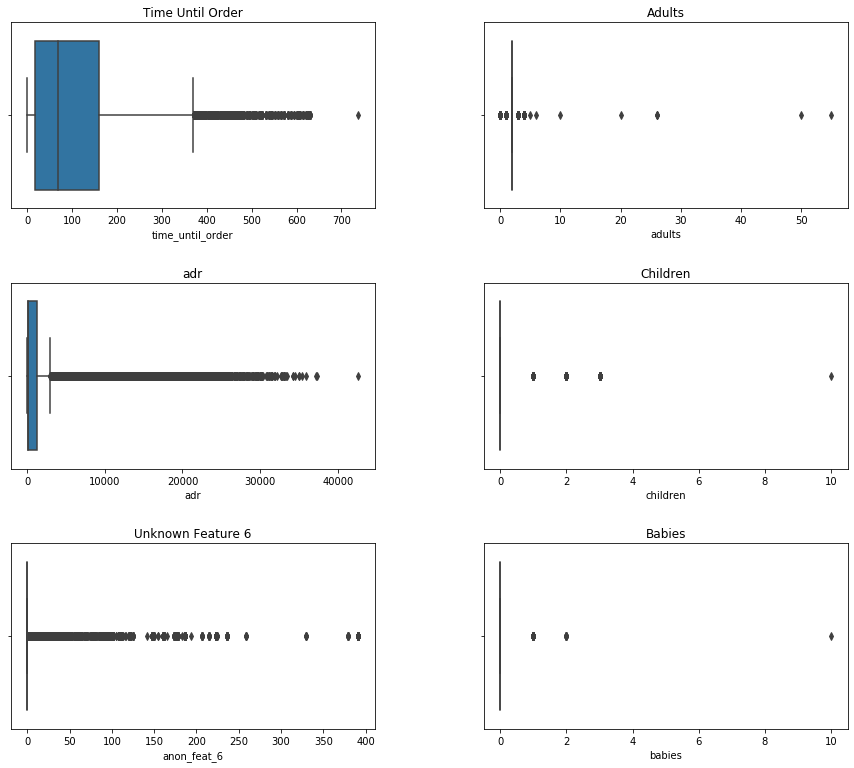

In [122]:
# Creating a subplots grid
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 13))

# Adjusts spacing between sub plots
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

# Plotting 'time_until_order'
sns.boxplot(ax = axes[0,0], data = df, x='time_until_order')
axes[0,0].set_title('Time Until Order')

# Plotting 'adults'
sns.boxplot(ax = axes[0,1], data = df, x='adults')
axes[0,1].set_title('Adults')

# Plotting 'adr' 
sns.boxplot(ax = axes[1,0], data = df, x='adr')
axes[1,0].set_title('adr')

# Plotting 'children'
sns.boxplot(ax = axes[1,1], data = df, x='children')
axes[1,1].set_title('Children')

# Plotting 'Unknown Feature 6'
sns.boxplot(ax = axes[2,0], data = df, x='anon_feat_6')
axes[2,0].set_title('Unknown Feature 6')

# Plotting 'babies'
sns.boxplot(ax = axes[2,1], data = df, x='babies')
axes[2,1].set_title('Babies')

plt.show()

<div class = "alert alert-block alert-warning">
After modeling, we came back here and tried removing different features based on the graphs above.
Eventually, removing adr, adults, children and babies resulted in the highest AUC
</div>

## 1.2 Labeled Analysis <a class="anchor" id="section1_2"></a>

Reading the labels data:

In [123]:
y = pd.read_csv('label_data.csv')

We now plot each feature with relation to the labels data

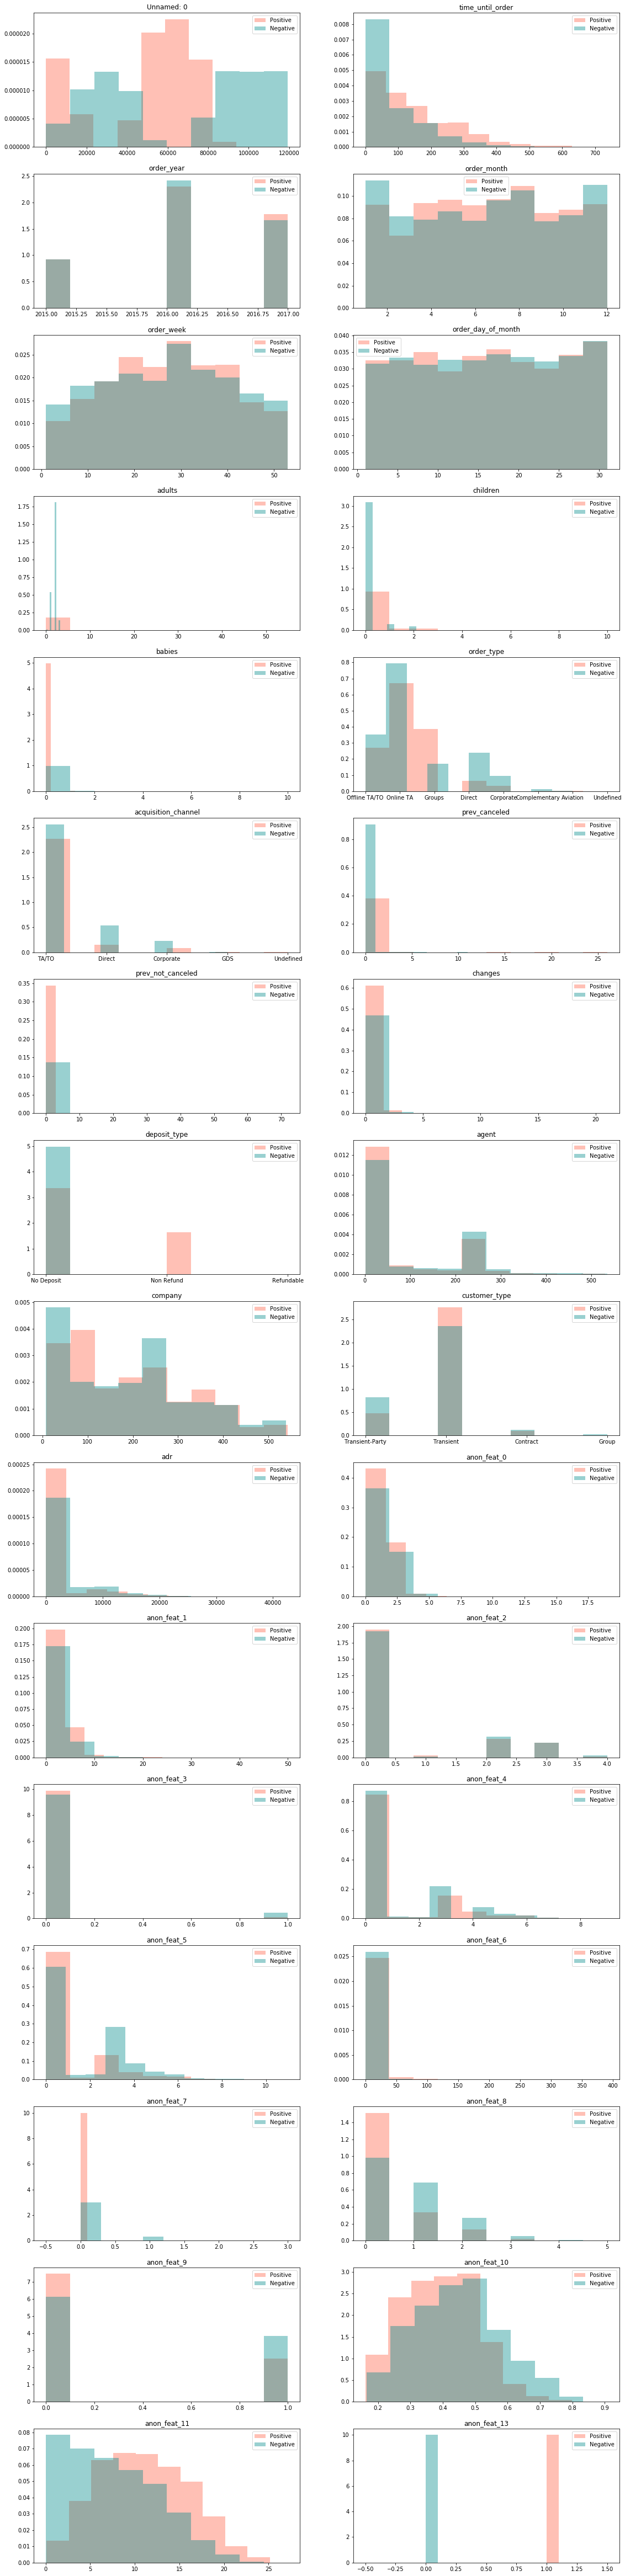

In [124]:
# Creating a subplots grid
fig, axs = plt.subplots(16, 2, figsize = (19, 85))

# Flattening our subplots grid for easy iterating
axs = axs.ravel()

# Setting an iterating variable 'i'
i = 0

# Using 'for' loop to plot each feature in a different slot on our grid
for col in df.drop(columns = ['anon_feat_12','country']).columns:
    if i < 32:
        not_na = ~df[col].isna()
        pos = df[col][not_na][y['cancelation'].astype(bool)][not_na]
        neg = df[col][not_na][~y['cancelation'].astype(bool)][not_na]
        axs[i].hist(pos, color = 'tomato', alpha = 0.4, label = 'Positive', density = True)
        axs[i].hist(neg, color = 'darkcyan', alpha = 0.4, label = 'Negative', density = True)
        axs[i].legend()
        axs[i].set_title(col)
        i += 1

# Show the final subplots grid
plt.show()

Based on the histograms, we think that some of the features won't help the models with prediction, including: `order_year`, `order_month`, `order_week`, `order_day_of_month`, `agent`, `anon_feat_2`, `anon_feat_3`, `anon_feat_6`.

## Preprocessing <a class="anchor" id="section2"></a>

Before splitting into train and validation sets, we will replace the labels from True and False to 1 and 0, respectivly

In [125]:
d = {True:1 , False:0}
y['cancelation'] = y['cancelation'].map(d)

Defining some functions that will help us to process our data:

In [126]:
def remove_outlier(X,y,col):
    z_scores = ((X[col] - X[col].mean())/(X[col].std(ddof = 0)))
    X, y = X[z_scores < 3], y[z_scores < 3]
    return X.copy(), y.copy()

Fill empty values in the dataframe

In [127]:
# Some funtions to help us impute numerical values:

# Imputes by median
def fill_na_median(data, column_name):
    data[column_name].fillna(value = data[column_name].median(), inplace = True)

# Imputes by mean
def fill_na_mean(data, column_name, X_tr):
    data[column_name].fillna(value = X_tr[column_name].mean(), inplace = True)

# Imputes by zeros
def fill_na_zero(data, column_name):
    data[column_name].fillna(value = 0, inplace = True)
            
# Impute categorical values:        
def fill_categorical(data,column_name,fill_with):
    data[column_name].fillna(fill_with, inplace = True)

Some functions to manipulate existing features:

In [128]:
# Changes countries that appears in less than 1% of the data to 'other'
def change_country(X):
    # New list of target countries
    countries = []

    # Checking the total number of appearances per country
    countries_sum = X['country'].value_counts()

    # Size of countries_sum (number of countries)
    size_cs = countries_sum.size

    # Finding target countries and adding them to the list
    for i in range(size_cs):
         if countries_sum[i]<=len(X['country']) * 0.01:
            countries.append(countries_sum.index[i]) 
            
    # Replacing target countries with 'other'
    X['country'].replace(to_replace = countries, value = 'other', inplace = True)
    train_countries = X['country'].value_counts()
    return train_countries, X

def in_train(X, feature, change_to, lst):
    for row in X.loc[:,feature]:
        if row not in lst.index:
            X[feature].replace(to_replace = row, value = change_to, inplace = True)    
    return X

# Changes 'non Refund' to 1, otherwise 0
def deposit_encode(df):
    if df['deposit_type'] == 'Non Refund':
        return 1
    return 0

Encode categorical data:

In [129]:
# Encode by one hot encoder:   
def One_Hot_Encoder(X, features, X_tr):
    OH = OneHotEncoder()
    OH.fit(X_tr[features])
    OH_data = OH.transform(X[features])
    encoded_X = pd.DataFrame(OH_data.toarray(), index = X.index)
    X = pd.concat([X, encoded_X], axis=1)
    return X

Scaling the data:

In [130]:
def Standard_Scaler(data, numerical_cols, X_tr):
    standard_scaler = StandardScaler()
    standard_scaler.fit(X_tr[numerical_cols])
    scaler_data = standard_scaler.transform(data[numerical_cols])
    df_numerical = pd.DataFrame(scaler_data, columns = numerical_cols)
    data.drop(numerical_cols, axis = 1, inplace = True)
    data = data.reset_index(drop = True)
    df_numerical = df_numerical.reset_index(drop = True)
    data = pd.concat([data,df_numerical], axis = 1)
    return data

Dimension reduction:

In [131]:
def pca_convert(X, X_tr):
    
    pca = decomposition.PCA(0.99, whiten = True)
    pca.fit(X_tr)
    X_pca = pca.transform(X)
    print("For explained variance: 0.99", "number of dimensions:", X_pca.shape[1])
    
    explained_variance_ratio = pca.explained_variance_ratio_
    var = np.cumsum(np.round(explained_variance_ratio,decimals=3)*100)
    
    plt.ylabel('% Variance Explaines')
    plt.xlabel('number of features')
    plt.title('PCA Analysis')
    plt.ylim(20,110)
    plt.xlim(0,30)
    plt.plot(var)
    plt.show()
    return X_pca

### Let's split our data set into train and validation sets

In [132]:
# Split into train and test - 80% train and 20% test
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=1)

# We used 'copy()' method in order to avoid warning, as seen in the recitations
X_train = X_train.copy()
y_train = y_train.copy()
X_val = X_val.copy()
y_val = y_val.copy()

Preprocess the train dataset

In [133]:
# Remove outliers
#Adr, adults, children and babies have many outliers. We will clean those features to only maintain data that distributes evenly.
X_train, y_train = remove_outlier(X_train, y_train, 'adr')
dfIndex = X_train[~(X_train['adults'] < 10) | ~(X_train['children'] < 10) | ~(X_train['babies'] < 10)].index
X_train.drop(dfIndex, inplace = True)
y_train.drop(dfIndex, inplace = True)

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)

# Dealing with missing values:
    
# For features with integer values we decided to fill na values with zeros (because half a child is not recommended...)
for feature in ['children','changes','order_month','anon_feat_7']:
    fill_na_zero(X_train, feature)


# For features with float values we decided to fill na values with the mean value of each feature in order not to change the mean
for feature in ['time_until_order','adr','anon_feat_0','anon_feat_5','anon_feat_9','anon_feat_10','anon_feat_11']:
    fill_na_mean(X_train, feature, X_train)


# For categorical features we decided to fill na values with 'other'
for feature in ['customer_type','acquisition_channel','order_type']:
    fill_categorical(X_train, feature,'other')
    
# For 'country' we decided to fill na values with the most common country (Portugal)
fill_categorical(X_train, 'country', 'PRT')

# Encode the countries that appear in less than 1% of the Train data to other in order to prevent large variance
train_countries, X_train = change_country(X_train) # Saving the remaining countries to encode the test and validation sets

# Encode 1 for 'non refund' and 0 otherwise
X_train['deposit_given'] = X_train.apply(deposit_encode, axis = 1)

# Delete features
# Our dataset has 88,642 examples, we can see that 'anon_feat_13' and 'company' has almost 85,000 missing values. Therefore, we need to delete them from df.
# As we've seen in the labeled analysis, agent feature won't contribute to the predictions (we also tried encoding it the same way as country, which didn't affect the AUC)
# We removed the order id column from the data set because it has high variance and we think it won't help the predictions
# We removed the 'acquisition_channel' feature beacause it's values are very similar to 'order_type'
# We removed the remaining features based on the labeled analysis
X_train.drop(labels = ['anon_feat_13','company','agent','Unnamed: 0','anon_feat_2','anon_feat_3','anon_feat_6',
                       'acquisition_channel','order_month','order_day_of_month','deposit_type'], inplace = True, axis = 1)
numerical_cols = numerical_cols.drop(['anon_feat_13','company','agent','anon_feat_2','anon_feat_3',
                                      'anon_feat_6','order_month','order_day_of_month'])

# Creating new features
X_train['num_of_people'] = X_train['adults'] + X_train['children'] + X_train['babies']
X_train.drop(labels = ['adults','children','babies'], inplace = True, axis = 1)
numerical_cols = numerical_cols.insert(0,'num_of_people')
numerical_cols = numerical_cols.drop(['adults','children','babies'])

# We will drop the rows with zero num_of_people from the train set
zero_guests = list(X_train.loc[X_train['num_of_people']==0].index)
X_train.drop(X_train.index[zero_guests], inplace=True)
y_train.drop(X_train.index[zero_guests], inplace = True)

X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

# Encode the boolean feature by 1 or 0
d = {True:1 , False:0}
X_train['anon_feat_12'] = X_train['anon_feat_12'].map(d)

# At this point we wiil save an unscaled and not encoded version of X_train for using in test and validation preprocessing 
X_tr = X_train.copy()

# Encode the categorical features by one hot encoder
features = ['order_type','customer_type','country']
X_train = One_Hot_Encoder(X_train, features, X_train)
X_train.drop(labels = features, inplace = True, axis = 1)


# Many features have wide range of values, in order to compare between different feature's weights, we need to scale them
X_train = Standard_Scaler(X_train, numerical_cols, X_train)

We will write a function that preprocesses our test and validation sets

In [134]:
def preprocessing(X,numerical_cols,X_tr,train_countries):
    
    # Dealing with missing values:
    
    # For features with integer values we decided to fill na values with zeros (because half a child is not recommended...)
    for feature in ['children','changes','order_month','anon_feat_7']:
        fill_na_zero(X,feature)

    # For features with float values we decided to fill na values with the mean value of each feature in order not to change the mean
    for feature in ['time_until_order','adr','anon_feat_0','anon_feat_5','anon_feat_9','anon_feat_10','anon_feat_11']:
        fill_na_mean(X,feature,X_tr)

    # For categorical features we decided to fill na values with 'other'
    for feature in ['customer_type','acquisition_channel','order_type']:
        fill_categorical(X, feature,'other')
    
    # For 'country' we decided to fill na values with the most common country (Portugal)
    fill_categorical(X, 'country', 'PRT')
    X = in_train(X, 'country', 'other', train_countries)
    
    # Encode 1 for 'non refund' and 0 otherwise
    X['deposit_given'] = X.apply(deposit_encode, axis = 1)
    
    # Delete features
    # Our dataset has 88,642 examples, we can see that 'anon_feat_13' and 'company' has almost 85,000 missing values. Therefore, we need to delete them from df.
    # As we've seen in the labeled analysis, agent feature won't contribute to the predictions (we also tried encoding it the same way as country, which didn't affect the AUC)
    # We removed the order id column from the data set because it has high variance and we think it won't help the predictions
    # We removed the 'acquisition_channel' feature beacause it's values are very similar to 'order_type'
    # We removed the remaining features based on the labeled analysis
    X.drop(labels = ['anon_feat_13','company','agent','anon_feat_2','anon_feat_3','anon_feat_6',
                     'acquisition_channel','order_month','order_day_of_month','deposit_type'], inplace = True, axis = 1)

    # Creating new features
    X['num_of_people'] = X['adults'] + X['children'] + X['babies']
    X.drop(labels = ['adults','children','babies'], inplace = True, axis = 1)
    
    # Encode the boolean feature by 1 or 0
    d = {True:1 , False:0}
    X['anon_feat_12'] = X['anon_feat_12'].map(d)
    
    # Encode the categorical features by one hot encoder
    features = ['order_type','customer_type','country']
    X = One_Hot_Encoder(X, features, X_tr)
    X.drop(labels = features, inplace = True, axis = 1)
    
    # 'Unnamed: 0' (order ID) is a variable with large variance, we will need it only for the predictions, so we will remove it.
    orders = X['Unnamed: 0']
    X.drop(labels = 'Unnamed: 0', inplace = True, axis = 1)
    
    # Many features have wide range of values, in order to compare between different feature's weights, we need to scale them
    X = Standard_Scaler(X, numerical_cols, X_tr)
    
    
    return X, orders

Preprocessing the validation set

In [135]:
X_val, orders = preprocessing(X_val, numerical_cols, X_tr, train_countries)

**Dimension Reduction:**<br> a large number of dimensions can result in overfitting because it creates greater variance (according to Bias-Variance tradeoff).
Another advantage for reducing the number of dimensions is that it can shorten the total runtime.
While using different models, we kept getting bad validation AUC (caused by overfitting), so we decided to use PCA method in order to reduce the number of dimensions.


Train PCA
For explained variance: 0.99 number of dimensions: 31


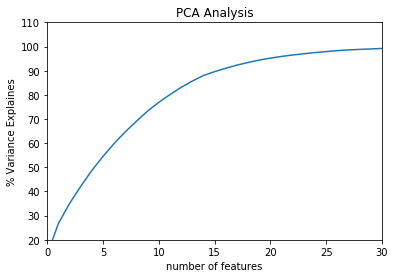

Validation PCA
For explained variance: 0.99 number of dimensions: 31


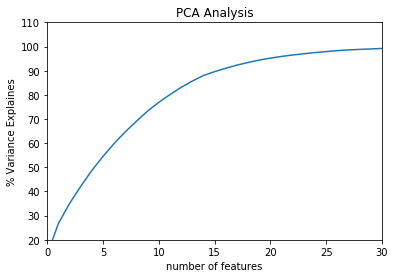

In [136]:
# Dimension reduction

# Creating a scaled and encoded copy of X_train to use in Validation and Test set's PCA
X_train_encoded = X_train.copy()

print('Train PCA')
X_train = pca_convert(X_train, X_train_encoded)
print('Validation PCA')
X_val = pca_convert(X_val, X_train_encoded)

## Modeling <a class="anchor" id="section3"></a>

At this point, we ran every model appeared in the project options and chose the ones that gave us the best score.
<br>The models we chose are:
- Logistic Regression
- K-Nearest Neighbors
- Random Forest 
- Multi-Layer Perceptron (ANN)

In [137]:
LR_clf = LogisticRegression(solver = 'liblinear', C= 1000, penalty = 'l2')
knn = KNeighborsClassifier(n_neighbors = 50, weights = 'distance')

rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 200)
ann = MLPClassifier(activation = 'logistic', batch_size = 10, hidden_layer_sizes = (50, 50), learning_rate_init = 0.01, max_iter = 1500)

clfs = [knn,LR_clf,rf,ann]

In order to find the ideal hyperparameters for each model, we ran `GridSearchCV()` algorithm (which is included in the end of the notebook as a comment due to runtime limitation).

## Model Evaluation<a class="anchor" id="section4"></a>

Now, we need to plot a confusion matrix for one of the models. We chose to plot the confusion matrix of Logistic Regression.

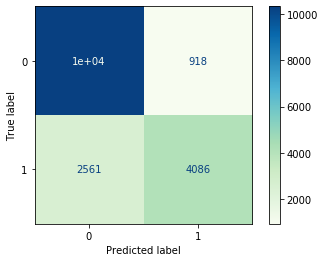

In [138]:
LR_clf.fit(X_train,y_train['cancelation'])
plot_confusion_matrix(LR_clf,X_val,y_val['cancelation'], cmap = 'GnBu')
plt.show()

The confusion matrix has four outcomes, $TP$, $FP$, $FN$, $TN$, we will explain every one of them in relation to our model:<br>
- <span style = "color:#52A1EA" > True </span> <span style = "color:#46BD6A" > Positive </span> (TP): the model predicted 4,086 positives and was correct - predicted cancellation for canceled orders
- <span style = "color:#52A1EA" > True </span> <span style = "color:#FF5645" > Negative </span> (TN): the model predicted 10,000 negatives and was correct - predicted no cancellation for non canceled orders
- <span style = "color:#B050E4" > False </span> <span style = "color:#46BD6A" > Positive </span> (FP): the model predicted 918 positives and was wrong - predicted cancellation for non canceled orders
- <span style = "color:#B050E4" > False </span> <span style = "color:#FF5645" > Negative </span> (FN): the model predicted 2,561 negatives and was wrong - predicted no cancellation for canceled orders

Finally, let's define and run k-fold cross validation, including plotting ROC curve for every fold.

In [139]:
def KfoldPlot(X, y, clf, k):
    kf = KFold(n_splits = k,shuffle = False)
    plt.figure()
    
    # Setting mean_tpr to 0 and x_ to random intervals between 0 and 1 (mean tpr and mean_fpr)
    x_ = np.linspace(0, 1, 90)
    mean_tpr = 0.0
    
    # Setting j variable (tracking folding number)
    j = 1
    
    # Using for loop 
    for train_index, valid_index in kf.split(X):
        print("folding No. ", j)
        
        # Splitting into train & validation
        X_train,X_valid = X[train_index],X[valid_index]
        y_train,y_valid = y[train_index],y[valid_index]
        
        # Fit X train & y train.
        clf.fit(X_train,y_train)
        
        # Finding the prediction probabilitiy
        y_score1 = clf.predict_proba(X_valid)[:,1]
        
        # Set ROC curve
        fpr, tpr, thresholds = roc_curve(y_valid,y_score1)
        
        roc_auc = auc(fpr, tpr)
        
        # Finding the total tpr
        mean_tpr += interp(x_,fpr,tpr)
        
        # Plotting the current fold
        plt.plot(fpr,tpr,color = 'lightgrey', label='ROC fold %d (AUC = %0.2f)' % (j, roc_auc))
        
        j=j+1
    
    # Finding our mean tpr
    mean_tpr[0] = 0.0
    mean_tpr = mean_tpr/k
    mean_tpr[-1] = 1.0
    
    # Finding mean AUC
    mean_auc = auc(x_,mean_tpr)
    
    # Plotting our graph
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot(x_, mean_tpr, color = 'red', linestyle = '-', label = 'Mean ROC (area = %0.3f)' % mean_auc)
    plt.plot([0, 2], [0, 2], color='darkblue', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC for " + str(clf).partition('(')[0])
    plt.legend()
    plt.show()

Running K-fold cross validation with K=5

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5


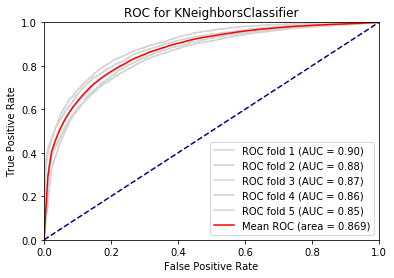

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5


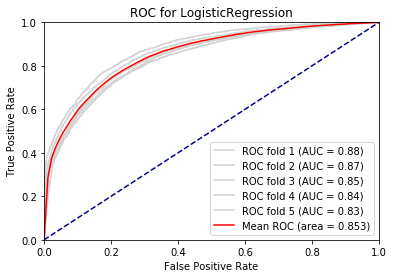

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5


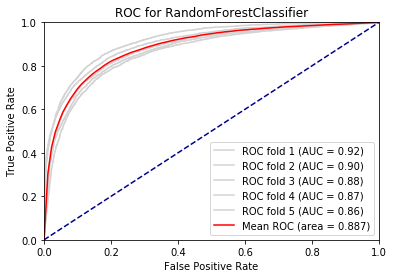

folding No.  1
folding No.  2
folding No.  3
folding No.  4
folding No.  5


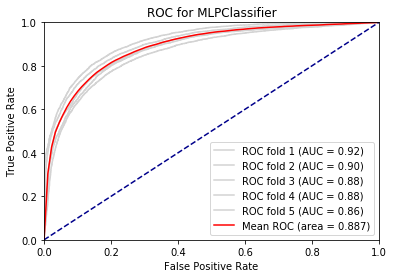

In [140]:
for clf in clfs:
    KfoldPlot(X_train,y_train['cancelation'],clf,5)

Evaluating and checking overfitting of our models by plotting train and validation roc curve for every one of them

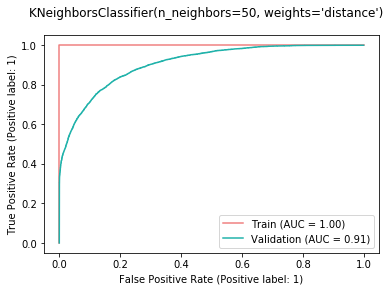

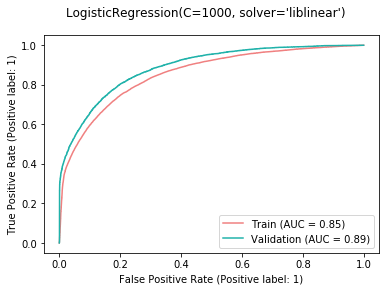

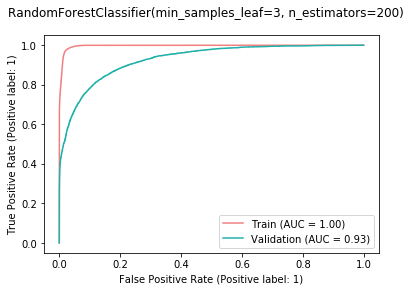

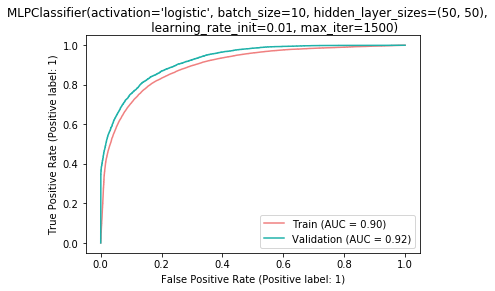

In [141]:
for clf in clfs:
    clf.fit(X_train,y_train['cancelation'])
    roc1 = plot_roc_curve(clf,X_train,y_train['cancelation'],color = 'lightcoral',name = 'Train')
    roc2 = plot_roc_curve(clf,X_val,y_val['cancelation'],color = 'lightseagreen',name = 'Validation',ax=roc1.ax_)
    roc2.figure_.suptitle(clf)
    plt.show()

During the project, we encountered a large difference between Train and Validation AUC. In order to prevent this we removed problematic features, used PCA to reduce dimensionality and remove correlation between features, manipulated features (for ex. `country`) and used `GridSearchCV()` in order to tune the hyperparameters.


### GridSearch

In [57]:
#from sklearn.model_selection import GridSearchCV
#parametersOptions = {'activation' : ["logistic", "relu"], 'hidden_layer_sizes' : [(100,), (50, 50), (20, 20, 10, 10, 10)],
                      #'batch_size' : [10, 50],
                      #'learning_rate_init' : [0.1, 0.01],
                      #'max_iter' : [1500]} 
#GS = GridSearchCV(MLPClassifier(), parametersOptions, cv=3, scoring='roc_auc')
#GS.fit(X_train, y_train['cancelation'])
#print (GS.best_params_)

{'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'max_iter': 1500}


In [58]:
#CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid = {'n_estimators':[100,150,200],'min_samples_leaf': [1,2,3,4],
                                                              #'min_samples_split': [2,3,4],'criterion':['gini','entropy']})
#CV_rfc.fit(X_train, y_train['cancelation'])
#print(CV_rfc.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [79]:
#param_grid = {'n_neighbors': [50,55], 'weights': ['uniform','distance']}
#CV_knn = GridSearchCV(knn,param_grid , cv=3, scoring = 'roc_auc')
#CV_knn.fit(X_train, y_train['cancelation'])
#print(CV_knn.best_params_)

{'n_neighbors': 50, 'weights': 'distance'}


In [81]:
#grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
#logreg_cv=GridSearchCV(LR_clf, grid, cv=5, scoring = 'roc_auc')
#logreg_cv.fit(X_train,y_train['cancelation'])
#print(logreg_cv.best_params_)

{'C': 1000, 'penalty': 'l2'}


## Test Predictions<a class="anchor" id="section5"></a>

For the predictions we chose to use Random Forest, because it resulted in the highest AUC.

For explained variance: 0.99 number of dimensions: 31


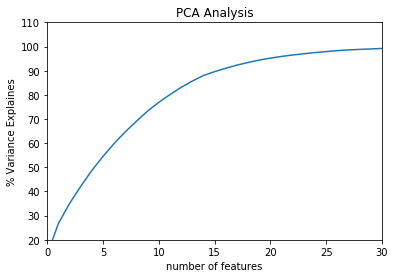

In [142]:
# Reading the test file
test = pd.read_csv('feature_data_test.csv')

# Implementing changes done in the exploration step
test.loc[:,'order_week'] = [col.lstrip('week_') for col in test.loc[:,'order_week']]
test['order_week'] = test['order_week'].astype(int)
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
test['order_month'] = test['order_month'].map(d)

# Preprocessing the test data
test, test_orders = preprocessing(test, numerical_cols, X_tr, train_countries)

# Dimension reduction using PCA
test = pca_convert(test, X_train_encoded)

We will concatenate the Train and Validation sets so that our selected model will train on as much data as possible

In [143]:
X_fit = np.concatenate((X_val,X_train))
y_fit = pd.concat([y_val,y_train])

# Fit the model to our data
rf.fit(X_fit,y_fit['cancelation'])

# Calculating our probabilities
y_score = rf.predict_proba(test)[:,1]

Writing the results to a csv file

In [144]:
df_test = pd.DataFrame(y_score, columns = ['cancel_proba'])
df_test = pd.concat([test_orders, df_test], axis = 1)
df_test.rename(columns = {'Unnamed: 0': ''}, inplace = True)
df_test.to_csv('Submission_group_16.csv', index = False)

![spongebob](https://media.giphy.com/media/26u4lOMA8JKSnL9Uk/giphy.gif "All Done!")